In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from datetime import datetime

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Training

In [2]:
train_processed_data_expanded = pd.read_csv('./output/scaled_train_data.csv')
# train_processed_data_expanded = train_processed_data_expanded.drop('Unnamed: 0', axis=1)

train_processed_data_expanded

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,encoded_tags
0,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.000000,0.509813,0.000001,2.486586e-06,...,0.0,9.179891e-05,0.022490,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184
1,0.578240,0.999839,0.016088,6.101171e-03,3.595742e-01,0.000223,0.000125,0.016082,0.037998,6.038352e-05,...,1.0,5.081934e-03,0.039148,0.764455,0.000006,0.019570,2.624302e-01,0.000000e+00,0.000404,141
2,0.467841,0.996626,0.002890,0.000000e+00,0.000000e+00,0.000000,0.000000,0.002891,0.000000,4.092086e-04,...,0.0,1.040388e-04,0.028460,0.859879,0.242375,0.361443,3.157241e-02,6.552889e-06,0.000009,194
3,0.322503,0.989857,0.023677,1.015950e-06,7.954423e-01,0.412684,0.127934,0.015942,0.116336,6.150468e-05,...,0.0,2.787286e-04,0.033901,0.751330,0.049434,0.032961,4.568948e-02,1.137700e-03,0.000133,60
4,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388330,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
5388331,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
5388332,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
5388333,0.293524,0.951149,0.006017,0.000000e+00,4.639506e-07,0.000000,0.000000,0.006017,0.000001,2.380474e-04,...,0.0,8.850077e-05,0.009008,0.996098,0.070973,0.048470,1.586959e-01,6.269141e-01,0.000092,142


In [3]:
test_processed_data_expanded = pd.read_csv('./output/scaled_test_data.csv')
# train_processed_data_expanded = train_processed_data_expanded.drop('Unnamed: 0', axis=1)

test_processed_data_expanded

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,encoded_tags
0,0.327324,0.999999,0.219593,1.000000e+00,4.189355e-01,0.000000,0.00000,0.219594,5.066213e-02,6.685087e-06,...,0.0,1.000000e+00,1.000000,0.998936,0.001565,0.153770,5.788697e-01,8.198362e-01,0.000041,124
1,0.327324,0.999999,0.219593,1.000000e+00,4.189355e-01,0.000000,0.00000,0.219594,5.066213e-02,6.685087e-06,...,0.0,1.000000e+00,1.000000,0.998936,0.001565,0.153770,5.788697e-01,8.198362e-01,0.000041,124
2,0.268661,0.999726,0.011852,0.000000e+00,4.806285e-08,0.000000,0.00000,0.011853,1.266585e-07,1.335921e-04,...,0.0,1.040388e-04,0.028460,0.859879,0.242375,0.361443,3.157241e-02,6.552889e-06,0.000009,194
3,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.00000,0.509813,1.013268e-06,2.486586e-06,...,0.0,9.179891e-05,0.022490,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184
4,0.387329,0.612336,0.001213,0.000000e+00,0.000000e+00,0.000000,0.00000,0.001214,0.000000e+00,4.416578e-04,...,0.0,1.099598e-05,0.008395,0.300106,0.000536,0.002547,0.000000e+00,4.597327e-07,0.002466,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149097,0.296351,0.983435,0.160314,4.718805e-03,4.475495e-02,0.000000,0.00000,0.160314,1.199722e-03,9.322364e-06,...,1.0,4.734385e-03,0.001017,0.706279,0.000131,0.130509,3.088446e-02,4.192803e-07,0.000040,106
1149098,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.00000,1.000000,5.276211e-02,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
1149099,0.387087,0.560943,0.115950,3.422385e-09,7.597835e-01,0.928852,0.00001,0.115950,1.000000e+00,3.698501e-06,...,1.0,2.448698e-08,0.000063,0.208585,0.000009,0.176432,8.838643e-01,1.165525e-05,0.000031,99
1149100,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.00000,0.509813,1.013268e-06,2.486586e-06,...,0.0,9.179891e-05,0.022490,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184


In [4]:
# Define the features and the target
# scale_pos_weight = len(processed_data_expanded[processed_data_expanded['encoded_label'] == 1]) / len(processed_data_expanded[processed_data_expanded['encoded_label'] == 0])
X_train = train_processed_data_expanded.drop('encoded_tags', axis=1)
y_train = train_processed_data_expanded['encoded_tags']

X_test = test_processed_data_expanded.drop('encoded_tags', axis=1)
y_test = test_processed_data_expanded['encoded_tags']

In [5]:
X_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.000000,0.509813,0.000001,2.486586e-06,0.601457,0.0,9.179891e-05,0.022490,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003
1,0.578240,0.999839,0.016088,6.101171e-03,3.595742e-01,0.000223,0.000125,0.016082,0.037998,6.038352e-05,0.460920,1.0,5.081934e-03,0.039148,0.764455,0.000006,0.019570,2.624302e-01,0.000000e+00,0.000404
2,0.467841,0.996626,0.002890,0.000000e+00,0.000000e+00,0.000000,0.000000,0.002891,0.000000,4.092086e-04,0.561301,0.0,1.040388e-04,0.028460,0.859879,0.242375,0.361443,3.157241e-02,6.552889e-06,0.000009
3,0.322503,0.989857,0.023677,1.015950e-06,7.954423e-01,0.412684,0.127934,0.015942,0.116336,6.150468e-05,0.690923,0.0,2.787286e-04,0.033901,0.751330,0.049434,0.032961,4.568948e-02,1.137700e-03,0.000133
4,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388330,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
5388331,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
5388332,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
5388333,0.293524,0.951149,0.006017,0.000000e+00,4.639506e-07,0.000000,0.000000,0.006017,0.000001,2.380474e-04,0.679590,0.0,8.850077e-05,0.009008,0.996098,0.070973,0.048470,1.586959e-01,6.269141e-01,0.000092


In [6]:
# train_processed_data = pd.read_csv('./output/non_nan_balanced_data.csv')
val_processed_data_expanded = pd.read_csv('./output/scaled_val_data.csv') 
# processed_data_expanded = processed_data_expanded.drop('Unnamed: 0', axis=1)

val_processed_data_expanded

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,encoded_tags
0,0.566236,0.697855,0.009106,0.000000e+00,0.000000e+00,0.000000,0.000000,0.009106,0.000000,3.972780e-05,...,0.0,9.179891e-05,2.248993e-02,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184
1,0.395012,0.999643,0.012381,0.000000e+00,9.524506e-04,0.000000,0.000000,0.012382,0.000697,1.076902e-04,...,0.0,4.002599e-05,6.486638e-03,0.730756,0.007162,0.013356,6.395042e-04,0.000000e+00,0.000405,180
2,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
3,0.387087,0.560943,0.115950,3.422385e-09,7.597835e-01,0.928852,0.000010,0.115950,1.000000,3.698501e-06,...,1.0,3.437215e-09,1.528109e-08,0.184108,0.000010,0.197636,1.000000e+00,1.319294e-05,0.000027,154
4,0.481720,0.478761,0.001350,4.569686e-06,1.391312e-02,0.000000,0.000000,0.001350,0.003393,5.133540e-05,...,1.0,1.723015e-06,3.776245e-05,0.094714,0.017997,0.015916,2.773921e-01,0.000000e+00,0.000272,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123244,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
1123245,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
1123246,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.000000,0.509813,0.000001,2.486586e-06,...,0.0,9.179891e-05,2.248993e-02,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184
1123247,0.288678,0.987561,0.033791,2.722036e-03,1.401579e-02,0.000009,0.000208,0.033779,0.001292,4.493264e-05,...,1.0,8.863601e-04,2.160720e-02,0.905640,0.000995,0.066771,1.111779e-01,2.173034e-02,0.000083,75


In [7]:
X_val = val_processed_data_expanded.drop('encoded_tags', axis=1)
y_val = val_processed_data_expanded['encoded_tags']

# Remove the Tag class with below 10 count, double check to make sure
counts = y_val.value_counts()

y_val = y_val[y_val.isin(counts[counts > 10].index)] # 10 is cutof as mentioned in Preprocessing step
X_val = X_val.loc[y_val.index]

X_val

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,0.566236,0.697855,0.009106,0.000000e+00,0.000000e+00,0.000000,0.000000,0.009106,0.000000,3.972780e-05,0.171641,0.0,9.179891e-05,2.248993e-02,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003
1,0.395012,0.999643,0.012381,0.000000e+00,9.524506e-04,0.000000,0.000000,0.012382,0.000697,1.076902e-04,0.632633,0.0,4.002599e-05,6.486638e-03,0.730756,0.007162,0.013356,6.395042e-04,0.000000e+00,0.000405
2,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
3,0.387087,0.560943,0.115950,3.422385e-09,7.597835e-01,0.928852,0.000010,0.115950,1.000000,3.698501e-06,0.203465,1.0,3.437215e-09,1.528109e-08,0.184108,0.000010,0.197636,1.000000e+00,1.319294e-05,0.000027
4,0.481720,0.478761,0.001350,4.569686e-06,1.391312e-02,0.000000,0.000000,0.001350,0.003393,5.133540e-05,0.032889,1.0,1.723015e-06,3.776245e-05,0.094714,0.017997,0.015916,2.773921e-01,0.000000e+00,0.000272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123244,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
1123245,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
1123246,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.000000,0.509813,0.000001,2.486586e-06,0.601457,0.0,9.179891e-05,2.248993e-02,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003
1123247,0.288678,0.987561,0.033791,2.722036e-03,1.401579e-02,0.000009,0.000208,0.033779,0.001292,4.493264e-05,0.720373,1.0,8.863601e-04,2.160720e-02,0.905640,0.000995,0.066771,1.111779e-01,2.173034e-02,0.000083


In [10]:
print ("X_train_expanded shape: ", X_train.shape)
print ("y_train shape: ", y_train.shape)

print ("----------------------------------")
print("processed_data_expanded has NaN values:", train_processed_data_expanded.isnull().values.any())
print("X_train has NaN values:", X_train.isnull().values.any())
print("y_train has NaN values:", y_train.isnull().values.any())

print("X_train has infinite values:", np.isinf(X_train.values).any())
print("y_train has infinite values:", np.isinf(y_train.values).any())

print ("----------------------------------")
print("Column dtypes:\n", X_train.dtypes)

X_train_expanded shape:  (5388335, 20)
y_train shape:  (5388335,)
----------------------------------
processed_data_expanded has NaN values: False
X_train has NaN values: False
y_train has NaN values: False
X_train has infinite values: False
y_train has infinite values: False
----------------------------------
Column dtypes:
 feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
dtype: object


In [11]:
y_train.values

array([184, 141, 194, ..., 203, 142, 203], dtype=int64)

In [12]:
y_train.ravel()

array([184, 141, 194, ..., 203, 142, 203], dtype=int64)

In [13]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes= np.unique(y_train), y = y_train.values)
# class_weight_dict = dict(enumerate(class_weights))
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
# class_weight_dict = {0: 999, 1: 0.01} # 1 : 1 is balanced

class_weight_dict

{0: 1.4850574693636367,
 1: 1.2056916834374487,
 2: 2.3638273548187847,
 3: 3033.97240990991,
 4: 18.40165222083342,
 5: 4.0909791470216215,
 6: 13.605257443542197,
 7: 1.143546726938953,
 8: 275.8156736281736,
 9: 1.48188407590691,
 10: 167.39158123640883,
 11: 1.9899794440665146,
 12: 54.6661695479263,
 13: 197.3315388559291,
 14: 1.0612933659501216,
 15: 6.964642547856321,
 16: 14.881532360073132,
 17: 18.222056515975435,
 18: 0.8852498095878357,
 19: 6.022774014709499,
 20: 0.41670436725117654,
 21: 0.7246172462168402,
 22: 19.278617378299664,
 23: 2.804689077799778,
 24: 551.6313472563472,
 25: 74.22562470727608,
 26: 66.3163368286319,
 27: 28.354882335606636,
 28: 41.419418565323,
 29: 18.613327668158956,
 30: 674.2160910910911,
 31: 68.17915527887438,
 32: 379.24655123873873,
 33: 0.48874930587944826,
 34: 1155.7990132990133,
 35: 332.49012711341476,
 36: 6.099969660537642,
 37: 4.733186286910936,
 38: 1.9896531911861037,
 39: 185.28075785709373,
 40: 25.738896372512492,
 41: 1.

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=25, class_weight=class_weight_dict) # 'balanced' class_weight_dict
clf.fit(X_train, y_train.values)

RandomForestClassifier(class_weight={0: 1.4850574693636367,
                                     1: 1.2056916834374487,
                                     2: 2.3638273548187847, 3: 3033.97240990991,
                                     4: 18.40165222083342,
                                     5: 4.0909791470216215,
                                     6: 13.605257443542197,
                                     7: 1.143546726938953, 8: 275.8156736281736,
                                     9: 1.48188407590691,
                                     10: 167.39158123640883,
                                     11: 1.9899794440665146,
                                     12: 54.6661695479263,
                                     13: 197.3315388559291,
                                     14: 1.0612933659501216,
                                     15: 6.964642547856321,
                                     16: 14.881532360073132,
                                     17: 18.22205651597543

In [15]:
import pickle

with open('./output/random_forest.pkl', 'wb') as file: #_999_0_01
    pickle.dump(clf, file)

In [16]:
# Predict and evaluate the model
y_test_pred = clf.predict(X_test)
y_test_pred

array([124, 124, 194, ...,  99, 184, 184], dtype=int64)

In [17]:
# Predict on training data
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 1.0
Test accuracy: 1.0


In [18]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred))

Confusion Matrix:
[[3486    0    0 ...    0    0    0]
 [   0 4293    0 ...    0    0    0]
 [   0    0 2190 ...    0    0    0]
 ...
 [   0    0    0 ...   47    0    0]
 [   0    0    0 ...    0   43    0]
 [   0    0    0 ...    0    0    3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3486
           1       1.00      1.00      1.00      4293
           2       1.00      1.00      1.00      2190
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00       281
           5       1.00      1.00      1.00      1265
           6       1.00      1.00      1.00       381
           7       1.00      1.00      1.00      4526
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00      3493
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00      2601
          12       1.00    

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_test_pred_bin = lb.transform(y_test_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_test_pred_bin, average='macro')
print(f"ROC AUC: {roc_auc}")

ROC AUC: 1.0


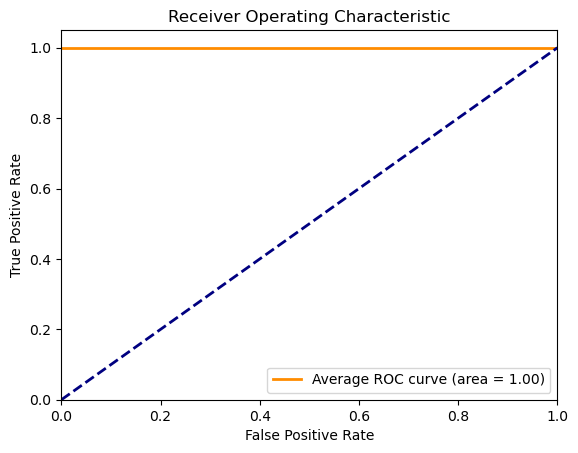

In [20]:
# Compute ROC curve and ROC area for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot average ROC curve
plt.figure()
plt.plot(fpr["macro"], tpr["macro"], color='darkorange', lw=2, label='Average ROC curve (area = %0.2f)' % roc_auc["macro"])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Validate with separate data

The Train vs Validation ratio right now is 7:3

In [21]:
import pickle

with open('./output/random_forest.pkl', 'rb') as file: #_999_0_01
    loaded_model = pickle.load(file)
    
clf = loaded_model

In [22]:
# Predict and evaluate the model
# y_val_pred = clf.predict(X_val)
# y_val_pred

# Predict the class probabilities on the test set
y_val_pred_prob = clf.predict_proba(X_val)

# get the class with the highest probability for each instance
y_val_pred_max_prob = np.argmax(y_val_pred_prob, axis=1)
y_val_pred_max_prob

array([184, 180, 203, ..., 184,  75, 203], dtype=int64)

In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_max_prob)) # y_val_pred_max_prob y_val_pred
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_max_prob))
print("\nAccuracy Score:")
print(accuracy_score(y_val, y_val_pred_max_prob))

Confusion Matrix:
[[3407    0    0 ...    0    0    0]
 [   0 4197    0 ...    0    0    0]
 [   0    0 2141 ...    0    0    0]
 ...
 [   0    0    0 ...   26    0    0]
 [   0    0    0 ...    0   46    0]
 [   0    0    0 ...    0    0   42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3407
           1       1.00      1.00      1.00      4197
           2       1.00      1.00      1.00      2141
           4       1.00      1.00      1.00       275
           5       1.00      1.00      1.00      1237
           6       1.00      1.00      1.00       372
           7       1.00      1.00      1.00      4424
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00      3414
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00      2543
          12       1.00      1.00      1.00        92
          13       1.00    

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the output
lb = LabelBinarizer()
y_val_bin = lb.fit_transform(y_val)
y_val_pred_bin = lb.transform(y_val_pred_max_prob)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val_bin, y_val_pred_bin, average='macro')
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9999269515744407


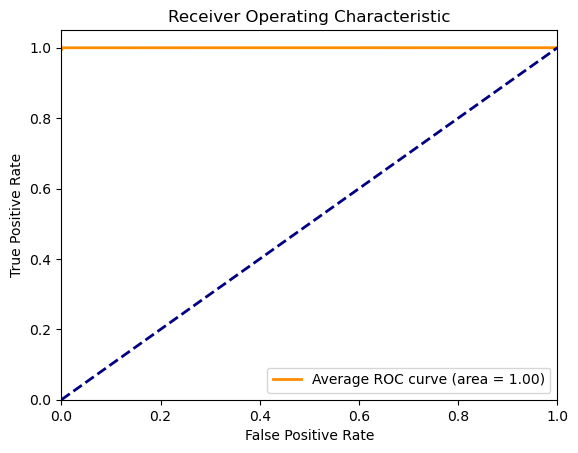

In [25]:
# Compute ROC curve and ROC area for each class
n_classes = y_val_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot average ROC curve
plt.figure()
plt.plot(fpr["macro"], tpr["macro"], color='darkorange', lw=2, label='Average ROC curve (area = %0.2f)' % roc_auc["macro"])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('./output/randomForest.png')
plt.show()

# Tested with BINARY CLASSIFICATION TO_ONLY and BOTH FROM AND TO, RESULT ARE THE SAME!!

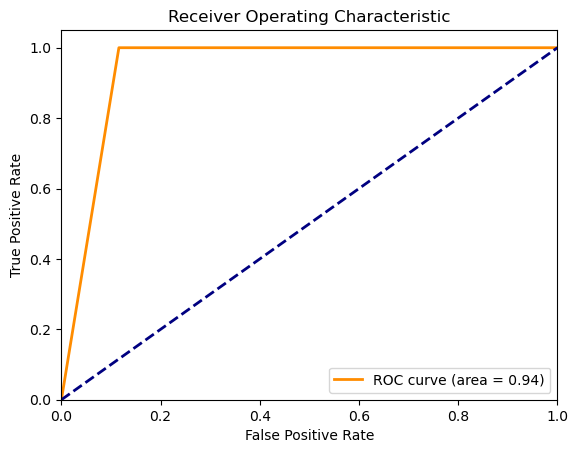

In [27]:
# # Compute ROC curve and ROC area
# fpr, tpr, _ = roc_curve(y_val, y_val_pred)
# roc_auc = auc(fpr, tpr)

# # Plot
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # random classifier
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")


# plt.savefig('randomForest.png')
# plt.show()